# Plotting a sine function in time domain

The code below contains the plot of a 0.15 Hz frequency sine wave sampled at 1 Hz.

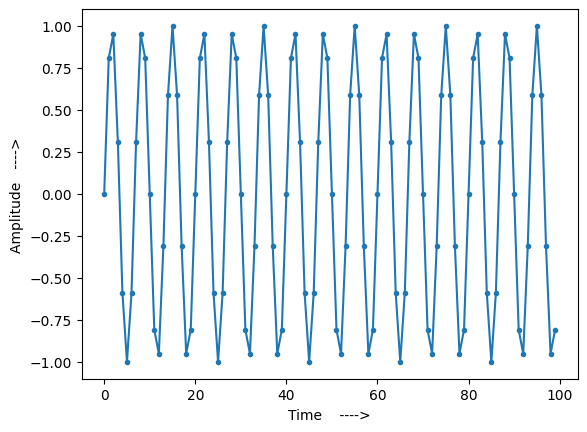

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Frequency of the wave
f = 0.15
# 100s Time array (x-axis) (from 0-99s)
t = np.arange(100)
# Sine function with f = 0.15 Hz sampled for 100s
s = np.sin(2 * np.pi * f * t)

# Create and disply the plot in time domain
plt.plot(t, s, '.-')
plt.xlabel('Time    ---->')
plt.ylabel('Amplitude   ---->')
plt.show()
